# Logistic Regression

In [34]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from preprocessing.hog import Flatten
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [36]:
#Load Metadata
hog_metadata_path = '../../data/hog/metadata.csv'
hog_metadata = pd.read_csv(hog_metadata_path, index_col=0)
hog_metadata.channels = hog_metadata.channels.astype(str)
hog_metadata

,channels,type,data_path,label_path
0,"[1, 2, 3]",dev,data/hog/dev/hog_0_1_2.npy,data/hog/dev/labels.npy
1,"[6, 7, 8]",dev,data/hog/dev/hog_5_6_7.npy,data/hog/dev/labels.npy
2,"[11, 12, 13]",dev,data/hog/dev/hog_10_11_12.npy,data/hog/dev/labels.npy
3,"[2, 4, 5]",dev,data/hog/dev/hog_1_3_4.npy,data/hog/dev/labels.npy
4,"[1, 2, 3]",test,data/hog/test/hog_0_1_2.npy,data/hog/test/labels.npy
5,"[6, 7, 8]",test,data/hog/test/hog_5_6_7.npy,data/hog/test/labels.npy
6,"[11, 12, 13]",test,data/hog/test/hog_10_11_12.npy,data/hog/test/labels.npy
7,"[2, 4, 5]",test,data/hog/test/hog_1_3_4.npy,data/hog/test/labels.npy
8,"[1, 2, 3]",train,data/hog/train/hog_0_1_2.npy,data/hog/train/labels.npy
9,"[6, 7, 8]",train,data/hog/train/hog_5_6_7.npy,data/hog/train/labels.npy


#### Pipeline

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
pipeline = Pipeline([('Standardize',StandardScaler()),('lr', LogisticRegression(fit_intercept = True,max_iter = 200, penalty = "l2"))])

#### Training, Test and Visualization of Scores

In [39]:
confusion_matrices = {}
metrics = {'algorithm': ['LR'] * 3,  'metrics': ['accuracy', 'precision', 'recall']}
for channel in hog_metadata.channels.unique():
    metrics[channel] = []

for channel in hog_metadata.channels.unique():
    train_metadata = hog_metadata[(hog_metadata.type == 'train') & (hog_metadata.channels == channel)]
    train = np.load(f'../../{train_metadata .data_path.values[0]}')
    train_label = np.load(f'../../{train_metadata.label_path.values[0]}')

    test_metadata = hog_metadata[(hog_metadata.type == 'test') & (hog_metadata.channels == channel)]
    test = np.load(f'../../{test_metadata.data_path.values[0]}')
    test_label = np.load(f'../../{test_metadata.label_path.values[0]}')
    
    pipeline.fit(train, train_label)
    
    test_pred = pipeline.predict(test)

    confusion_mat = confusion_matrix(test_label, pipeline.predict(test))
    confusion_matrices[channel] = confusion_mat
    
    precision, recall, *_ = precision_recall_fscore_support(test_label, test_pred)
    accuracy = accuracy_score(test_label, test_pred)
    metrics[channel] += [accuracy, max(precision), max(recall)]

c:\users\jonas\desktop\uni\msc\year 1\fds\final_project\fds-2022-final-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\jonas\desktop\uni\msc\year 1\fds\final_project\fds-2022-final-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

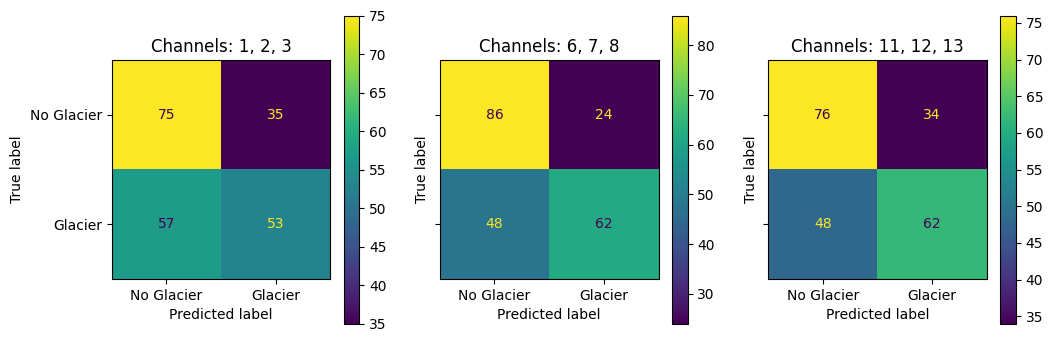

In [40]:
display_labels = ['No Glacier', 'Glacier']

fig, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(12, 4))

axes[0].set_title("Channels: 1, 2, 3")
axes[1].set_title("Channels: 6, 7, 8")
axes[2].set_title("Channels: 11, 12, 13")

ConfusionMatrixDisplay(confusion_matrices['[1, 2, 3]'], display_labels=display_labels).plot(ax=axes[0])
ConfusionMatrixDisplay(confusion_matrices['[6, 7, 8]'], display_labels=display_labels).plot(ax=axes[1])
ConfusionMatrixDisplay(confusion_matrices['[11, 12, 13]'], display_labels=display_labels).plot(ax=axes[2]);

In [41]:
pd.DataFrame(metrics)

,algorithm,metrics,"[1, 2, 3]","[6, 7, 8]","[11, 12, 13]","[2, 4, 5]"
0,LR,accuracy,0.581818,0.672727,0.627273,0.631818
1,LR,precision,0.602273,0.720930,0.645833,0.646465
2,LR,recall,0.681818,0.781818,0.690909,0.681818


In [42]:
pd.DataFrame(metrics).to_csv('./hog_lr_metrics.csv')